In [ ]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

rcParams.update({'font.size': 16})


N = 50
x = np.sort(np.random.randint(1000, size=150))
y = []
for i in x:
    y.append(i/5 **2+ 5*np.sin(i/10) + 10*np.sin(i/30)+ 10*np.random.rand(1)+20*np.cos(np.random.rand(1)/10))
    y.append(i/5 **2+ 5*np.sin(i/10) + 10*np.sin(i/30)+ 10*np.random.rand(1))

#     y.append(i/5+ 5*np.sin(i/5) )
y = np.array(y)
y[70] = 33.5
y[10] = 45.5
y[1] = 107.5

y[89] = 29.89

y[100] = 200
y[50] = 78.5
y[140] = 33.5

y[22] = 130.5
y[110] = 39.0

area = 5 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

In [8]:
x[70],y[70]

(434, array([ 33.5]))

In [9]:
def SMAeq(x,y,tau):
    left = 0
    roll_sum = 1
    out = []
    for right in range(len(x)):
        roll_sum = roll_sum + y[right]
        
        while x[left] <= (x[right]-tau):
            roll_sum = roll_sum - y[left]
            left+=1
        
        out.append( 1.0*roll_sum / (right - left + 1))
    
    return out

In [10]:
def trapezoid(x1, x2, x3, y1, y3):
    if (x2 == x3 or x2 < x1):
        return (x3 - x2) * y1
    else:
        weight = (x3 - x2) / (x3 - x1)
        y2 = y1 * weight + y3 * (1 - weight)
        return (x3 - x2) * (y2 + y3) / 2

In [11]:
def SMA(x,y,tau):
    
    left = 0
    roll_area = left_area = y[0] * tau 
    out = [y[0]]
    for right in range(1,len(x)):
        
        roll_area = roll_area + y[right-1] * (x[right] - x[right-1])  
        roll_area = roll_area - left_area
#          Shrink interval on left end
        t_left_new = x[right] - tau;
        while x[left] <= (x[right]-tau):
            roll_area = roll_area - y[left] * (x[left+1] - x[left])
            left+=1
        
        left_area = y[max(1, left-1)] * (x[left] - t_left_new)
        roll_area = roll_area + left_area
        out.append( 1.0*roll_area / tau)
    
    return out

In [12]:
def XMAX(x,y,tau):
    
    left = 0
    roll_area = left_area = y[0] * tau 
    out = [y[0]]
    for right in range(1,len(x)):
        
#         roll_area = roll_area + y[right-1] * (x[right] - x[right-1])
        
        roll_area = roll_area + (y[right-1] + y[right])/2 *(x[right] - x[right-1])
        
        roll_area = roll_area - left_area
#          Shrink interval on left end
        t_left_new = x[right] - tau
    
        while x[left] <= (x[right]-tau):
#             roll_area = roll_area - y[left] * (x[left+1] - x[left])
            roll_area = roll_area - (y[left] + y[left+1]) / 2 *(x[left+1] - x[left])
            left+=1
        
#         left_area = y[max(1, left-1)] * (x[left] - t_left_new)
        
        left_area = trapezoid(x[max(1, left-1)], t_left_new, x[left],y[max(1, left-1)], y[left])
        roll_area = roll_area + left_area
        out.append( 1.0*roll_area / tau)
    
    return out

In [13]:
import numpy as np


def medfilt (x, k):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert k % 2 == 1, "Median filter length must be odd."
    assert x.ndim == 1, "Input must be one-dimensional."
    k2 = (k - 1) // 2
    y = np.zeros ((len (x), k), dtype=x.dtype)
    y[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
    return np.median (y, axis=1)


def test ():
    import pylab as p
    x = np.linspace (0, 1, 101)
    x[3::10] = 1.5
    p.plot (x)
    p.plot (medfilt (x,3))
    p.plot (medfilt (x,5))
    p.show ()


In [14]:
p = np.ravel(y)
m = np.ravel(x)

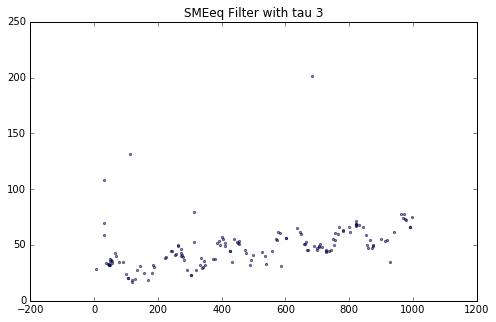

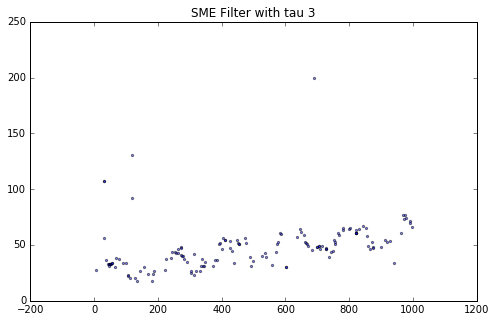

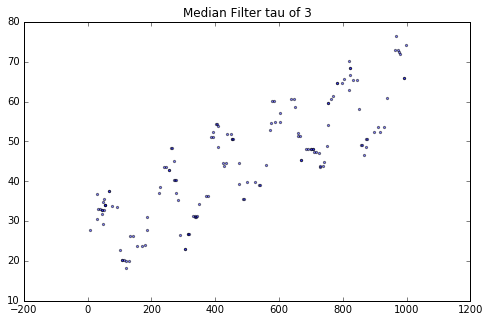

In [17]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 5

sme = SMAeq(x,y,3)
area = 5 # 0 to 15 point radiuses

plt.title('SMEeq Filter with tau 3')
plt.scatter(x, sme, s=area, alpha=0.5)
plt.savefig("SMEeq.png",dpi=100)
plt.show()

sme = SMA(x,y,3)
area = 5 # 0 to 15 point radiuses

plt.title('SME Filter with tau 3')
plt.scatter(x, sme, s=area, alpha=0.5)
plt.savefig("SME.png",dpi=100)
plt.show()



sme = medfilt(p,3)
area = 5 # 0 to 15 point radiuses
plt.title('Median Filter tau of 3')
plt.scatter(x, sme, s=area, alpha=0.5)
plt.savefig("MedianFilter.png",dpi=100)
plt.show()

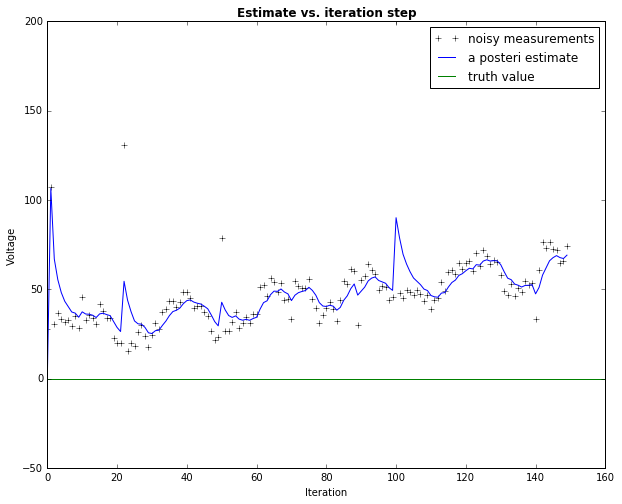

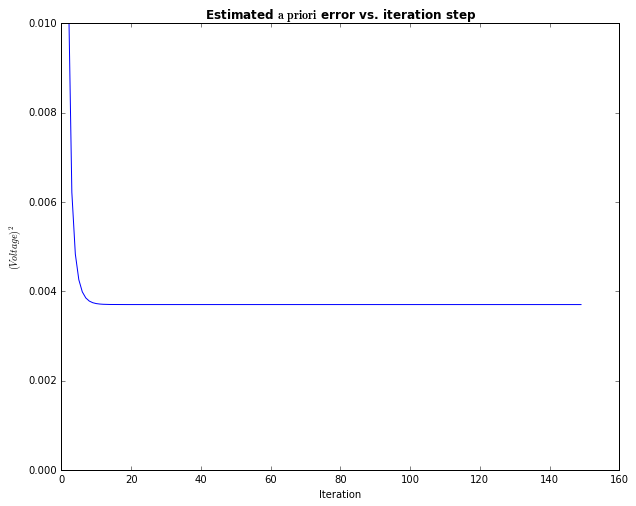

In [18]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html

# by Andrew D. Straw

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 150
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
# z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)
z = p
Q = 1e-3 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()